# Configuration

## Import packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
import warnings
import os
warnings.filterwarnings('ignore')

## Set plotting style

In [9]:
# Setting up plotting styles
# plt.style.available # Check matplolib availabe plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = (12, 6)

# Analytics

## Load Dataset

In [10]:
# Loading the dataset
def load_data(file_path):
    # Assuming the data is already provided as cleaned_canada.csv
    df = pd.read_csv(file_path)
    return df

DATA_DIR = os.environ.get('DATA_PATH')
DATA_PATH = f'{DATA_DIR}/cleaned_canada.csv'

# file_path = '/home/aircsrv5/Quan/DataOps/DataOps-bootstrap/demo/include/data/cleaned_canada.csv'
# file_path = "/home/aircsrv5/Quan/DataOps/DataOps-bootstrap/demo/include/data/full_canada.csv"

df = load_data(DATA_PATH)

## Data Cleaning

In [11]:
# Data Cleaning
def clean_data(df):
    print("Initial Data Shape:", df.shape)
    
    # Converting numeric columns to appropriate types
    numeric_cols = ['Price', 'Bedrooms', 'Bathrooms', 'Acreage', 'Square Footage']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Handling missing values
    print("\nMissing Values Before Cleaning:")
    print(df.isnull().sum())
    
    # Filling missing categorical values with 'Unknown'
    categorical_cols = ['Basement', 'Exterior', 'Fireplace', 'Heating', 'Flooring', 
                       'Roof', 'Waterfront', 'Sewer', 'Pool', 'Garden', 'View', 'Balcony']
    for col in categorical_cols:
        df[col] = df[col].fillna('Unknown')
    
    # Filling missing numeric values with median
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())
    
    print("\nMissing Values After Cleaning:")
    print(df.isnull().sum())
    
    return df

df = clean_data(df)

Initial Data Shape: (44896, 24)

Missing Values Before Cleaning:
City                  0
Province              0
Latitude              0
Longitude             0
Price                 0
Bedrooms              0
Bathrooms             0
Acreage               0
Property Type         0
Square Footage        0
Garage                0
Parking               0
Basement          29934
Exterior          27457
Fireplace             0
Heating            6654
Flooring          29680
Roof              34844
Waterfront            0
Sewer                 0
Pool                  0
Garden                0
View              44884
Balcony               0
dtype: int64

Missing Values After Cleaning:
City              0
Province          0
Latitude          0
Longitude         0
Price             0
Bedrooms          0
Bathrooms         0
Acreage           0
Property Type     0
Square Footage    0
Garage            0
Parking           0
Basement          0
Exterior          0
Fireplace         0
Heating       

## Basic Statiscal Analysis

In [12]:
# Basic Statistical Summary
def statistical_summary(df):
    print("\nBasic Statistical Summary:")
    print(df.describe())
    
    # Summary for categorical variables
    print("\nCategorical Variables Summary:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\n{col} Value Counts:")
        print(df[col].value_counts())

statistical_summary(df)


Basic Statistical Summary:
           Latitude     Longitude         Price      Bedrooms     Bathrooms  \
count  44896.000000  44896.000000  4.489600e+04  44896.000000  44896.000000   
mean      49.010267   -106.632760  1.070457e+06      3.214919      2.522652   
std        2.659066     22.270395  1.442961e+06      1.636517      1.423765   
min       42.045940   -135.856018  5.000000e+04      0.000000      0.000000   
25%       48.477511   -122.887882  3.999900e+05      2.000000      2.000000   
50%       49.217891   -119.395219  6.880000e+05      3.000000      2.000000   
75%       49.927914   -102.485638  1.200000e+06      4.000000      3.000000   
max       65.281488    -52.668600  5.880000e+07     37.000000     26.000000   

            Acreage  Square Footage  
count  44896.000000    44896.000000  
mean       2.485950     1787.726323  
std       86.626599     1988.320406  
min        0.000000      140.000000  
25%        0.000000      975.000000  
50%        0.060000     1417.000

# Attributes Analysis

## Price

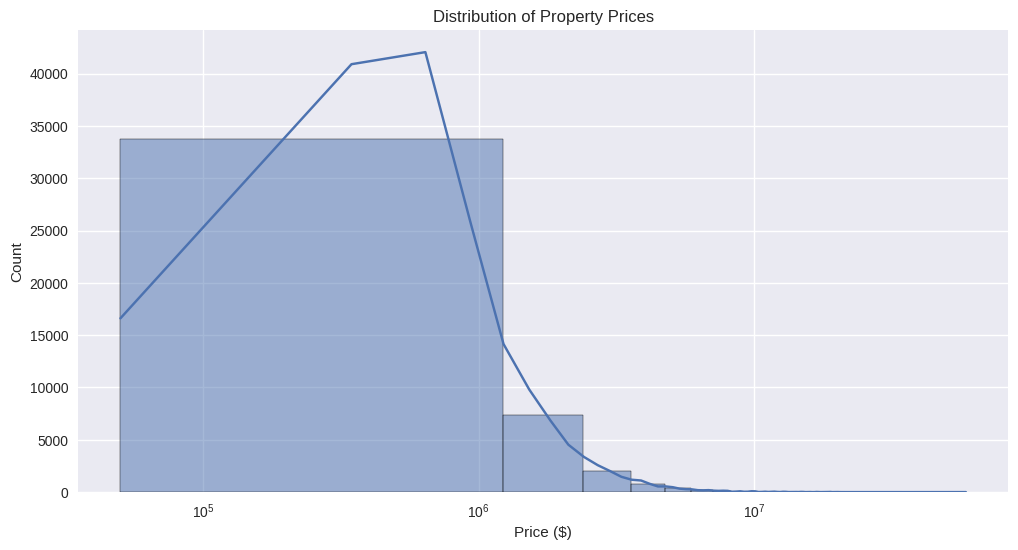

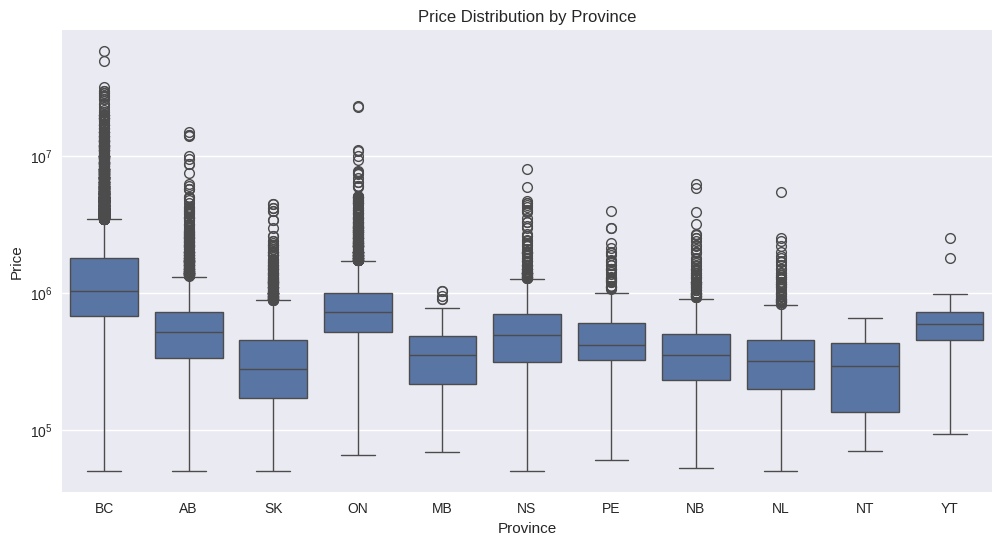

In [13]:

# Price Distribution Analysis
def price_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Price'], bins=50, kde=True)
    plt.title('Distribution of Property Prices')
    plt.xlabel('Price ($)')
    plt.ylabel('Count')
    plt.xscale('log')
    # plt.savefig('price_distribution.png')
    plt.show()
    
    # Boxplot for price by province
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Province', y='Price', data=df)
    plt.title('Price Distribution by Province')
    plt.yscale('log')
    # plt.savefig('price_by_province.png')
    plt.show()

price_distribution(df)

## Property

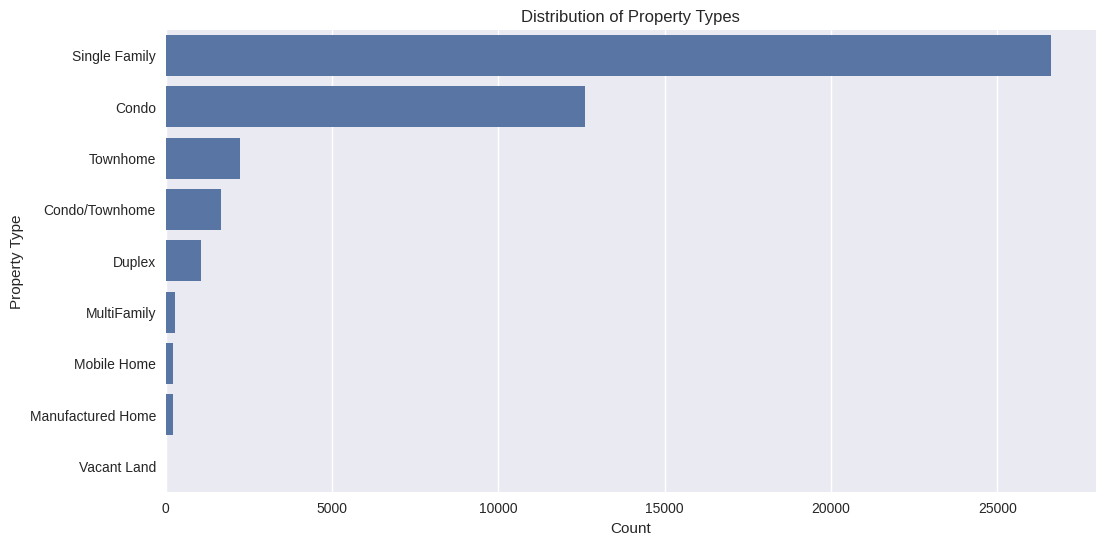

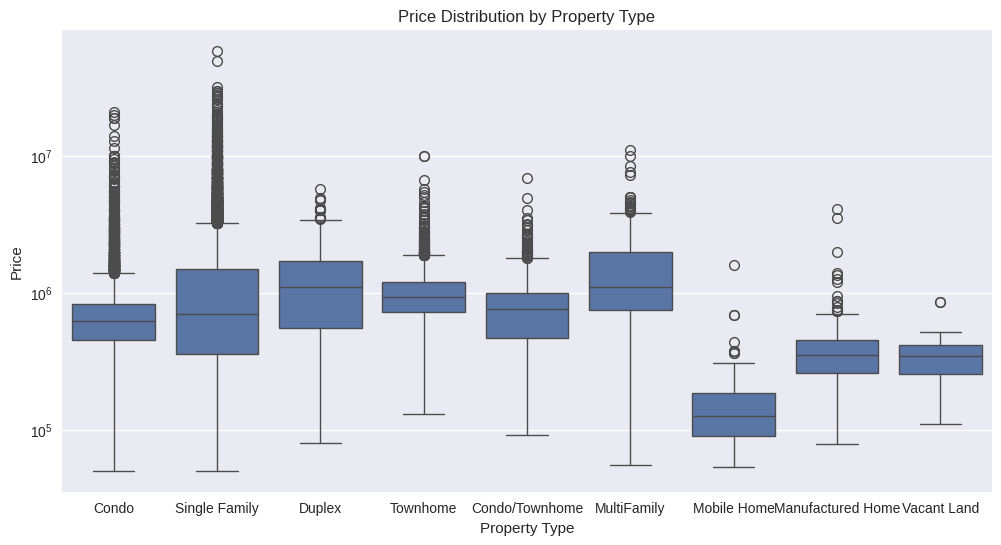

In [14]:
# Property Type Analysis
def property_type_analysis(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Property Type', data=df, order=df['Property Type'].value_counts().index)
    plt.title('Distribution of Property Types')
    plt.xlabel('Count')
    plt.ylabel('Property Type')
    # plt.savefig('property_type_distribution.png')
    plt.show()
    
    # Price by property type
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Property Type', y='Price', data=df)
    plt.title('Price Distribution by Property Type')
    plt.yscale('log')
    # plt.savefig('price_by_property_type.png')
    plt.show()

property_type_analysis(df)

# Bedroom

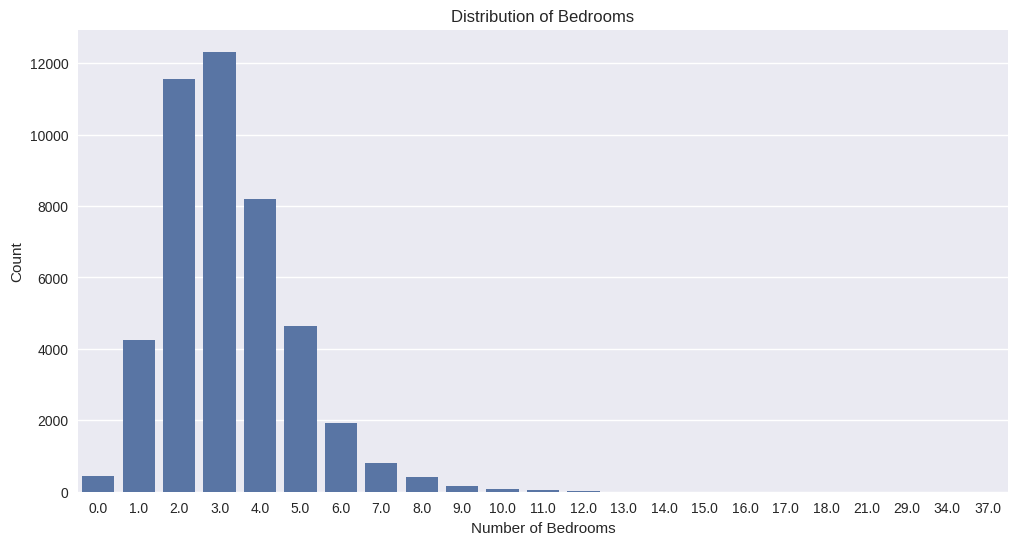

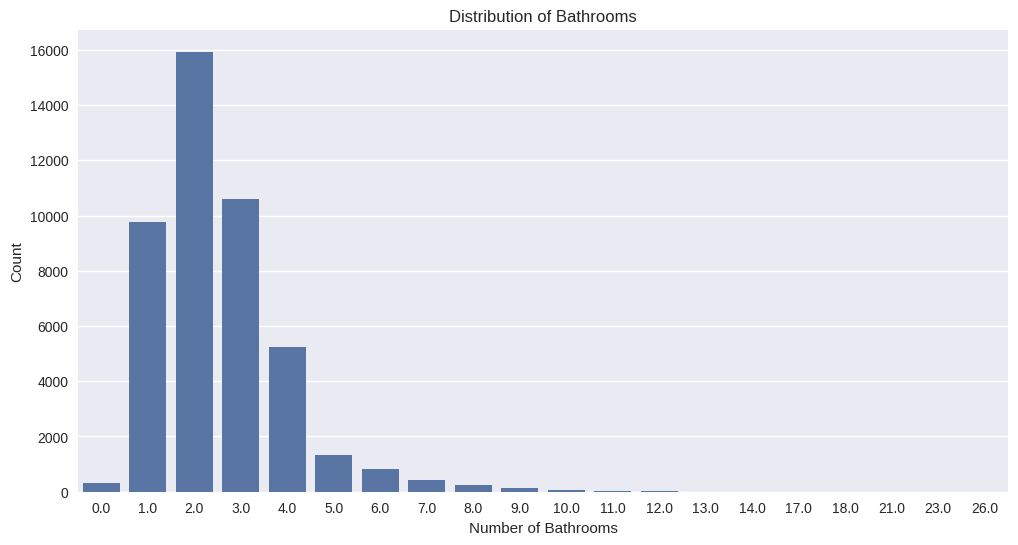

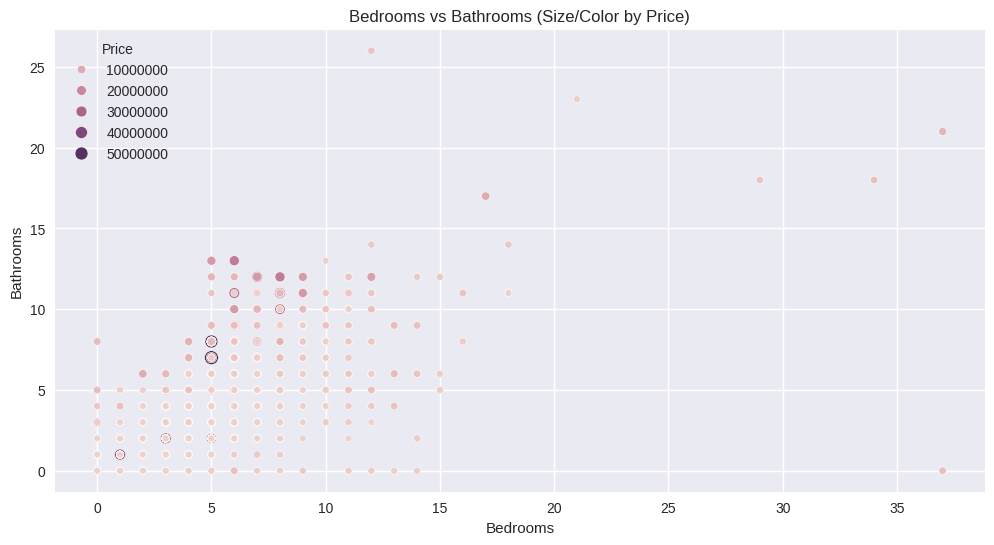

In [15]:
# Bedrooms and Bathrooms Analysis
def bedrooms_bathrooms_analysis(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Bedrooms', data=df)
    plt.title('Distribution of Bedrooms')
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Count')
    # plt.savefig('bedrooms_distribution.png')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Bathrooms', data=df)
    plt.title('Distribution of Bathrooms')
    plt.xlabel('Number of Bathrooms')
    plt.ylabel('Count')
    # plt.savefig('bathrooms_distribution.png')
    plt.show()
    
    # Scatter plot of bedrooms vs bathrooms
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Bedrooms', y='Bathrooms', size='Price', hue='Price', data=df)
    plt.title('Bedrooms vs Bathrooms (Size/Color by Price)')
    # plt.savefig('bedrooms_vs_bathrooms.png')
    plt.show()

bedrooms_bathrooms_analysis(df)

## Square footage

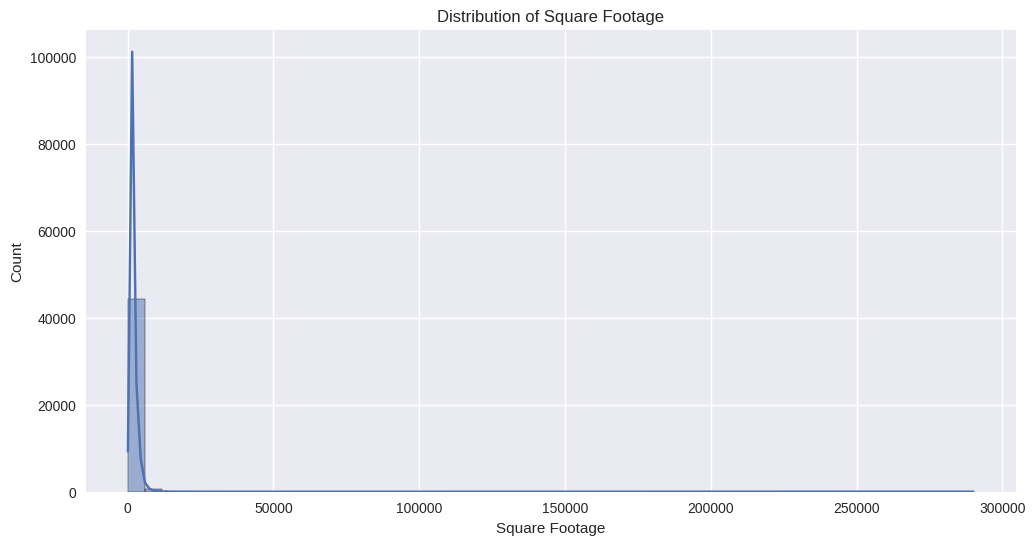

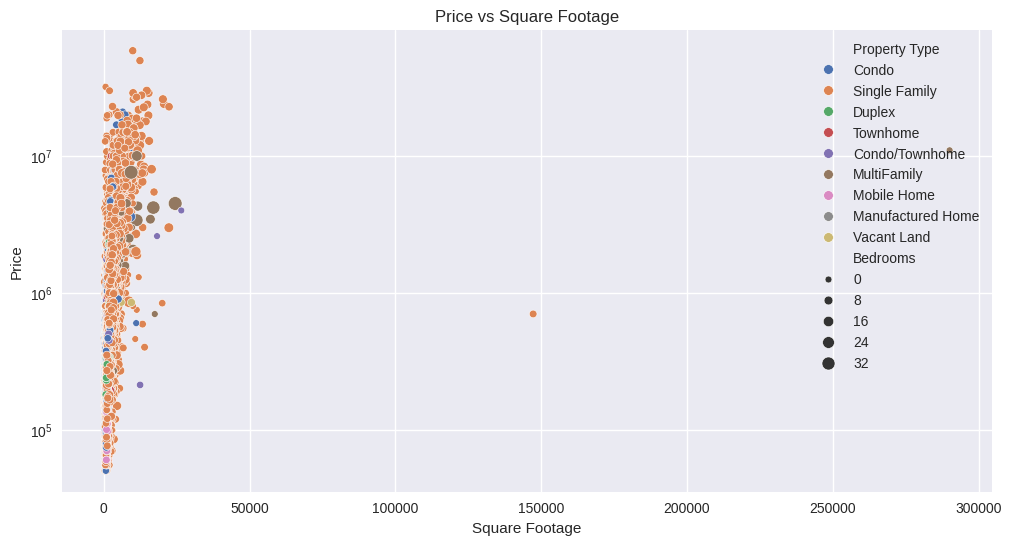

In [16]:
# Square Footage Analysis
def square_footage_analysis(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Square Footage'], bins=50, kde=True)
    plt.title('Distribution of Square Footage')
    plt.xlabel('Square Footage')
    plt.ylabel('Count')
    # plt.savefig('square_footage_distribution.png')
    plt.show()
    
    # Price vs Square Footage
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Square Footage', y='Price', hue='Property Type', size='Bedrooms', data=df)
    plt.title('Price vs Square Footage')
    plt.yscale('log')
    # plt.savefig('price_vs_square_footage.png')
    plt.show()

square_footage_analysis(df)

## Geographic

<Figure size 1200x800 with 0 Axes>

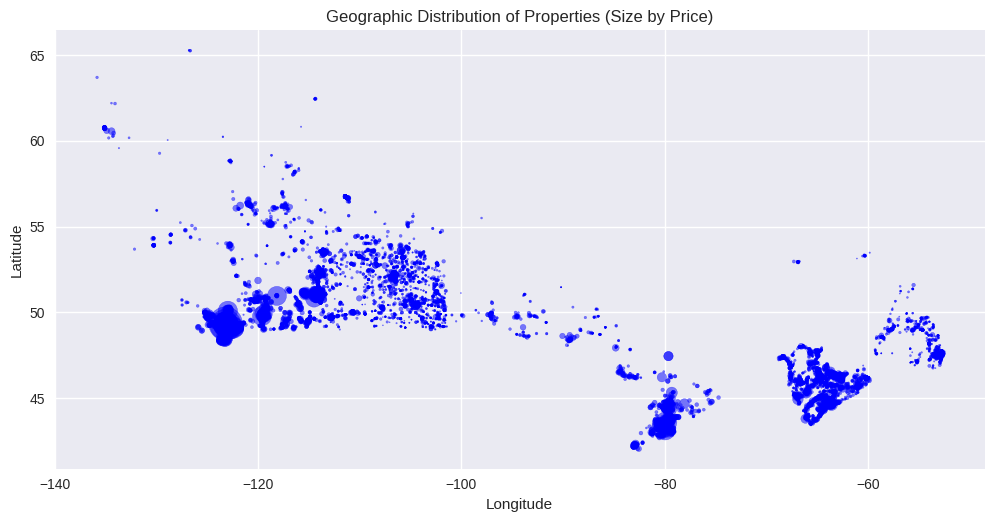

In [17]:
# Geographic Analysis
def geographic_analysis(df):
    # Creating GeoDataFrame
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
    
    plt.figure(figsize=(12, 8))
    gdf.plot(markersize=df['Price']/100000, alpha=0.5, c='blue')
    plt.title('Geographic Distribution of Properties (Size by Price)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.savefig('geographic_distribution.png')
    plt.show()

geographic_analysis(df)

# Correlation Analysis

## Correlation matrix

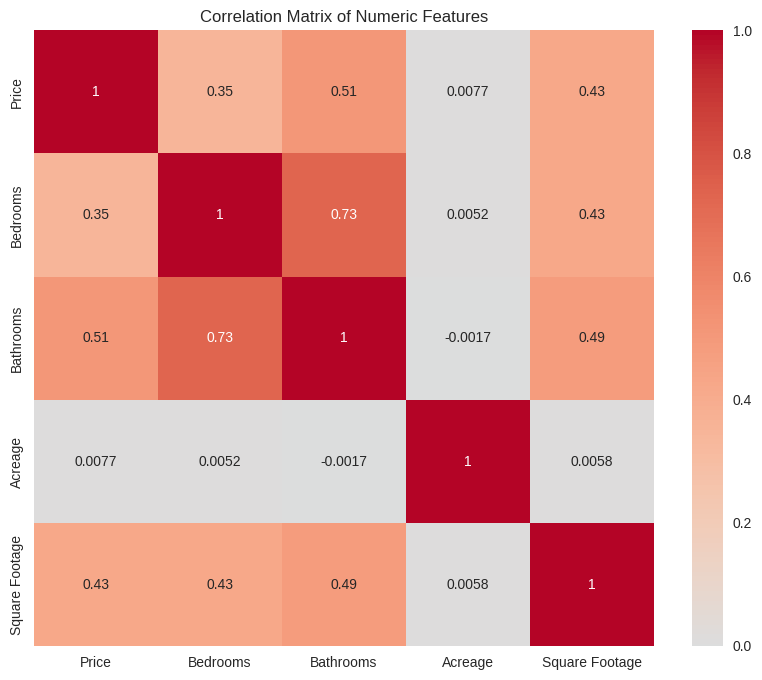

In [18]:
# Correlation Analysis
def correlation_analysis(df):
    numeric_cols = ['Price', 'Bedrooms', 'Bathrooms', 'Acreage', 'Square Footage']
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numeric Features')
    # plt.savefig('correlation_matrix.png')
    plt.show()
    
    # Pairplot for numeric variables
    # sns.pairplot(df[numeric_cols])
    # plt.savefig('pairplot_numeric.png')
    # plt.show()

correlation_analysis(df)

## Feature importance

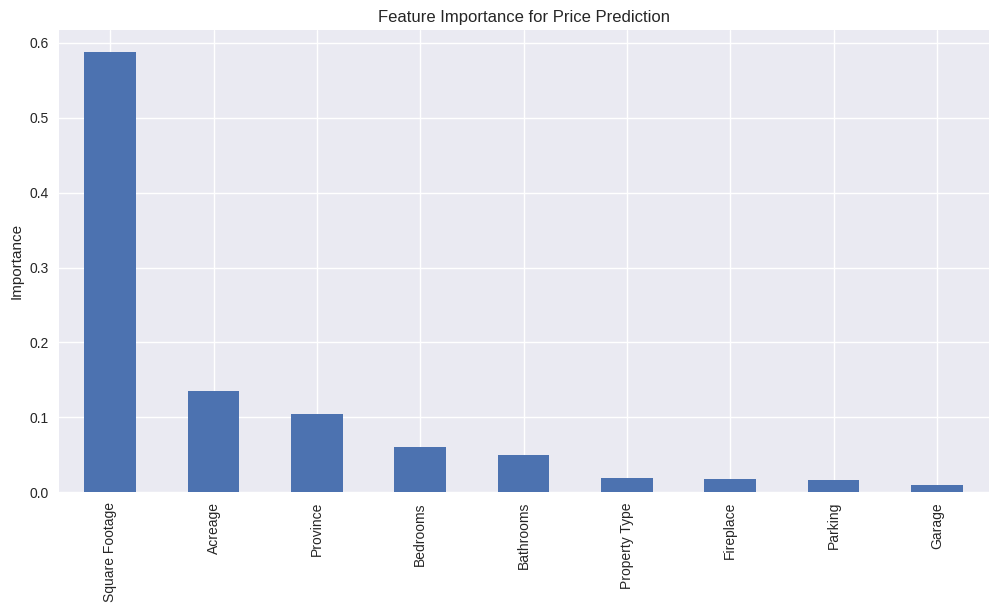

In [19]:
# Feature Importance Analysis
def feature_importance(df):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import LabelEncoder
    
    # Preparing data
    features = ['Bedrooms', 'Bathrooms', 'Acreage', 'Square Footage', 
                'Property Type', 'Province', 'Fireplace', 'Garage', 'Parking']
    X = df[features].copy()
    y = df['Price']
    
    # Encoding categorical variables
    le = LabelEncoder()
    for col in ['Property Type', 'Province', 'Fireplace', 'Garage', 'Parking']:
        X[col] = le.fit_transform(X[col].astype(str))
    
    # Training model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Plotting feature importance
    plt.figure(figsize=(12, 6))
    feature_importance = pd.Series(rf.feature_importances_, index=features)
    feature_importance.sort_values(ascending=False).plot(kind='bar')
    plt.title('Feature Importance for Price Prediction')
    plt.ylabel('Importance')
    # plt.savefig('feature_importance.png')
    plt.show()

feature_importance(df)

## Detecting Outlier

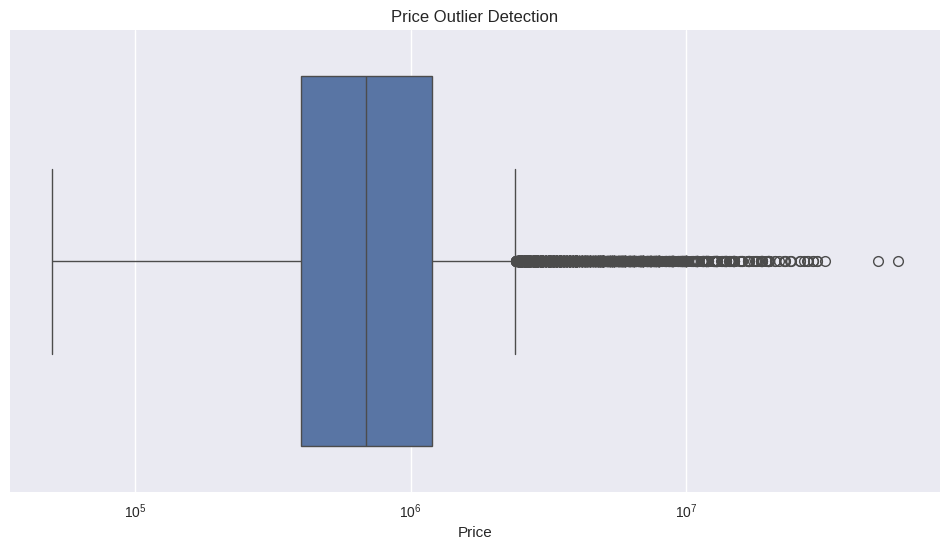


Number of Price Outliers (Z-score > 3): 687
                          City Province       Price  Property Type  \
260    Rural Rocky View County       AB  14300000.0  Single Family   
814             West Vancouver       BC   8190000.0  Single Family   
886                     Anmore       BC   6800000.0  Single Family   
937                  Vancouver       BC   6500000.0  Single Family   
982             West Vancouver       BC  11998000.0  Single Family   
...                        ...      ...         ...            ...   
40325                 Waterloo       ON  10999000.0    MultiFamily   
40419                   Guelph       ON   7599000.0    MultiFamily   
40911  Rural Rocky View County       AB  14300000.0  Single Family   
42076                  Canmore       AB   5750000.0  Single Family   
43503                  Canmore       AB   8717800.0  Single Family   

       Square Footage  
260           10778.0  
814            7055.0  
886           10849.0  
937            483

In [20]:
# Outlier Detection
def outlier_detection(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Price'])
    plt.title('Price Outlier Detection')
    plt.xscale('log')
    # plt.savefig('price_outliers.png')
    plt.show()
    
    # Z-score based outlier detection
    z_scores = stats.zscore(df['Price'])
    outliers = df[abs(z_scores) > 3]
    print("\nNumber of Price Outliers (Z-score > 3):", len(outliers))
    print(outliers[['City', 'Province', 'Price', 'Property Type', 'Square Footage']])

outlier_detection(df)

In [21]:
# Additional insights
print("\nKey Insights:")
print(f"Average Price by Province:\n{df.groupby('Province')['Price'].mean().sort_values()}")
print(f"\nMost Common Property Types:\n{df['Property Type'].value_counts().head()}")
print(f"\nAverage Square Footage by Property Type:\n{df.groupby('Property Type')['Square Footage'].mean().sort_values()}")


Key Insights:
Average Price by Province:
Province
NT    2.988846e+05
SK    3.563661e+05
NL    3.682448e+05
MB    3.927611e+05
NB    4.120528e+05
PE    5.045206e+05
NS    5.644346e+05
AB    6.273566e+05
YT    6.278351e+05
ON    9.201067e+05
BC    1.552201e+06
Name: Price, dtype: float64

Most Common Property Types:
Property Type
Single Family     26619
Condo             12593
Townhome           2237
Condo/Townhome     1655
Duplex             1056
Name: count, dtype: int64

Average Square Footage by Property Type:
Property Type
Condo                 964.665290
Manufactured Home    1086.938389
Mobile Home          1162.750000
Condo/Townhome       1488.824169
Townhome             1577.491730
Duplex               1738.734848
Vacant Land          1817.062500
Single Family        2199.941583
MultiFamily          4274.039146
Name: Square Footage, dtype: float64
